## Polynomial processes [GPs]

This notebook explores the idea of using Gaussian processes with polynomial expansions as kernel functions. 

In [67]:
from equadratures import *
import matplotlib.pyplot as plt

For illustrative purposes consider, the function below

In [70]:
parameter = Parameter(lower=-5, upper=5, order=20)
basis = Basis('univariate')
poly = Poly(parameter, basis, method='numerical-integration')

def squared_exp(sigma, l, r):
    return sigma**2 * np.exp(-0.5 * l**2 * r**2)

def polyfit(sigma, l, r):
    func =  lambda r : squared_exp(sigma, l, r)
    poly.set_model(func)
    return poly.get_polyfit(r)

def kernel(sigma, l, X, Xp):
    m, n = X.shape[0], Xp.shape[1]
    K = np.zeros((m, n))
    for j in range(0, n):
        polyfit(sigma, l, X - Xp[j,:])
    

Using a small number of samples, our goal is to arrive at the same resolution as the function above. To begin, we define the support, i.e.,

In [71]:
x = Parameter(lower=0, upper=2*np.pi, order=100)
b = Basis('univariate')
poly = Poly(x, b, method='numerical-integration')
poly.set_model(fun)
yp = poly.get_polyfit(xi)

sigma_data = 1e-3
U = poly.coefficients.shape[0]
prior_mu = np.zeros((U,1))
prior_mu[0] = 3.5
prior_cov = 0.00001 * np.diag(np.ones((U)))
inv_prior_cov = np.linalg.inv(prior_cov)

In [72]:
x3 = Parameter(lower=0, upper=2*np.pi, order=70)
b3 = Basis('univariate')
poly3 = Poly(x3, b3, method='numerical-integration')

In [73]:
pts = poly3.get_points()
training_outputs = fun(pts)
P = poly.get_poly(pts).T
        
A = 1./sigma_data**2 * P.T @ P + inv_prior_cov

posterior_cov = np.linalg.inv(A)
posterior_mu = posterior_cov @ (1./sigma_data ** 2 * P.T @ training_outputs + inv_prior_cov @ prior_mu)

In [32]:
xi = np.linspace(0, 2 * np.pi, 1500)

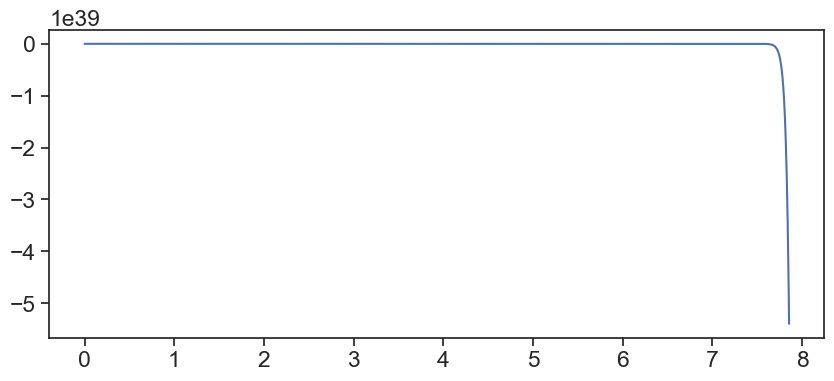

In [74]:
fig = plt.figure(figsize=(10,4))
plt.plot(xi, poly.get_poly(xi).T @ posterior_mu)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,4))
plt.plot(xi, fun(xi) - yp.flatten(), 'k=')
plt.title('Error')
plt.show()